<a href="https://colab.research.google.com/github/warn4n/dl2025/blob/main/Notebooks/Chap15/15_1_GAN_Toy_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 15.1: GAN Toy example**

This notebook investigates the GAN toy example as illustrated in figure 15.1 in the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get a batch of real data.  Our goal is to make data that looks like this.
def get_real_data_batch(n_sample):
  np.random.seed(0)
  x_true = np.random.normal(size=(1,n_sample)) + 7.5
  return x_true

Define our generator.  This takes a standard normally-distributed latent variable $z$ and adds a scalar $\theta$ to this, where $\theta$ is the single parameter of this generative model according to:

\begin{equation}
x_i = z_i + \theta.
\end{equation}

Obviously this model can generate the family of Gaussian distributions with unit variance, but different means.

In [3]:
# This is our generator -- takes the single parameter theta
# of the generative model and generates n samples
def generator(z, theta):
    x_gen = z + theta
    return x_gen

Now, we define our discriminator.  This is a simple logistic regression model (1D linear model passed through sigmoid) that returns the probability that the data is real

In [4]:
# Define our discriminative model

# Logistic sigmoid, maps from [-infty,infty] to [0,1]
def sig(data_in):
  return  1.0 / (1.0+np.exp(-data_in))

# Discriminator computes y
def discriminator(x, phi0, phi1):
  return sig(phi0 + phi1 * x)

In [5]:
# Draws a figure like Figure 15.1a
def draw_data_model(x_real, x_syn, phi0=None, phi1=None):
  fix, ax = plt.subplots();

  for x in x_syn:
    ax.plot([x,x],[0,0.33],color='#f47a60')
  for x in x_real:
    ax.plot([x,x],[0,0.33],color='#7fe7dc')

  if phi0 is not None:
    x_model = np.arange(0,10,0.01)
    y_model = discriminator(x_model, phi0, phi1)
    ax.plot(x_model, y_model,color='#dddddd')
  ax.set_xlim([0,10])
  ax.set_ylim([0,1])


  plt.show()

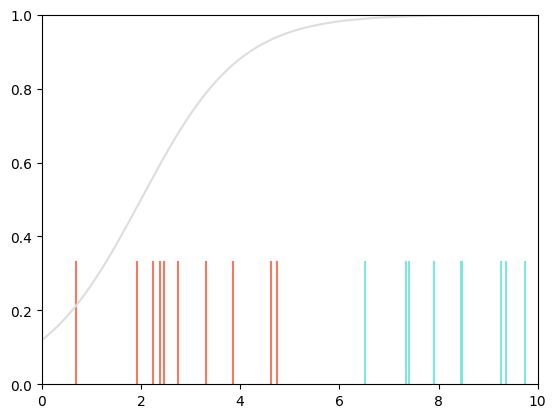

In [6]:
# Get data batch
x_real = get_real_data_batch(10)

# Initialize generator and synthesize a batch of examples
theta = 3.0
np.random.seed(1)
z = np.random.normal(size=(1,10))
x_syn = generator(z, theta)

# Initialize discriminator model
phi0 = -2
phi1 = 1

draw_data_model(x_real, x_syn, phi0, phi1)

You can see that the synthesized (orange) samples don't look much like the real (cyan) ones, and the initial model to discriminate them (gray line represents probability of being real) is pretty bad as well.

Let's deal with the discriminator first.  Let's define the loss

In [9]:
# Discriminator loss
def compute_discriminator_loss(x_real, x_syn, phi0, phi1):

  # TODO -- compute the loss for the discriminator
  # Run the real data and the synthetic data through the discriminator
  # Then use the standard binary cross entropy loss with the y=1 for the real samples
  # and y=0 for the synthesized ones.
  # Replace this line
  real = discriminator(x_real, phi0, phi1)
  syn = discriminator(x_syn, phi0, phi1)
  loss = np.sum(-np.log(real) - np.log(1-syn))


  return loss

In [10]:
# Test the loss
loss = compute_discriminator_loss(x_real, x_syn, phi0, phi1)
print("True Loss = 13.814757170851447, Your loss=", loss )

True Loss = 13.814757170851447, Your loss= 13.814757170851447


In [11]:
# Gradient of loss (cheating, using finite differences)
def compute_discriminator_gradient(x_real, x_syn, phi0, phi1):
  delta = 0.0001;
  loss1 = compute_discriminator_loss(x_real, x_syn, phi0, phi1)
  loss2 = compute_discriminator_loss(x_real, x_syn, phi0+delta, phi1)
  loss3 = compute_discriminator_loss(x_real, x_syn, phi0, phi1+delta)
  dl_dphi0 = (loss2-loss1) / delta
  dl_dphi1 = (loss3-loss1) / delta

  return dl_dphi0, dl_dphi1

# This routine performs gradient descent with the discriminator
def update_discriminator(x_real, x_syn, n_iter, phi0, phi1):

  # Define learning rate
  alpha = 0.01

  # Get derivatives
  print("Initial discriminator loss = ", compute_discriminator_loss(x_real, x_syn, phi0, phi1))
  for iter in range(n_iter):
    # Get gradient
    dl_dphi0, dl_dphi1 = compute_discriminator_gradient(x_real, x_syn, phi0, phi1)
    # Take a gradient step downhill
    phi0 = phi0 - alpha * dl_dphi0 ;
    phi1 = phi1 - alpha * dl_dphi1 ;

  print("Final Discriminator Loss= ", compute_discriminator_loss(x_real, x_syn, phi0, phi1))

  return phi0, phi1

Initial parameters (phi0,phi1) -2 1
Initial discriminator loss =  13.814757170851447
Final Discriminator Loss=  3.732902478030585
Final parameters (phi0,phi1) -3.554083457719191 0.7143290523577974


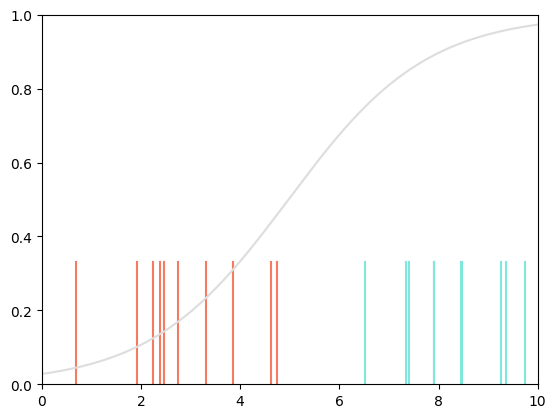

In [12]:
# Let's update the discriminator (sigmoid curve)
n_iter = 100
print("Initial parameters (phi0,phi1)", phi0, phi1)
phi0, phi1 = update_discriminator(x_real, x_syn, n_iter, phi0, phi1)
print("Final parameters (phi0,phi1)", phi0, phi1)
draw_data_model(x_real, x_syn, phi0, phi1)

Now let's update the generator

In [17]:
def compute_generator_loss(z, theta, phi0, phi1):
  # TODO -- Run the generator on the latent variables z with the parameters theta
  # to generate new data x_syn
  # Then run the discriminator on the new data to get the probability of being real
  # The loss is the total negative log probability of being synthesized (i.e. of not being real)
  # Replace this code
  x_syn = generator(z, theta)
  real = discriminator(x_syn, phi0, phi1)
  loss = -np.sum(np.log(1-real))
  return loss

In [18]:
# Test generator loss to check you have it correct
loss = compute_generator_loss(z, theta, -2, 1)
print("True Loss = 13.78437035945412, Your loss=", loss )

True Loss = 13.78437035945412, Your loss= 13.78437035945412


In [19]:
def compute_generator_gradient(z, theta, phi0, phi1):
  delta = 0.0001
  loss1 = compute_generator_loss(z,theta, phi0, phi1) ;
  loss2 = compute_generator_loss(z,theta+delta, phi0, phi1) ;
  dl_dtheta = (loss2-loss1)/ delta
  return dl_dtheta

def update_generator(z, theta, n_iter, phi0, phi1):
    # Define learning rate
    alpha = 0.02

    # Get derivatives
    print("Initial generator loss = ", compute_generator_loss(z, theta, phi0, phi1))
    for iter in range(n_iter):
      # Get gradient
      dl_dtheta = compute_generator_gradient(z, theta, phi0, phi1)
      # Take a gradient step (uphill, since we are trying to make synthesized data less well classified by discriminator)
      theta = theta + alpha * dl_dtheta ;

    print("Final generator loss = ", compute_generator_loss(z, theta, phi0, phi1))
    return theta


Theta before 3.0
Initial generator loss =  2.6027212360722376
Final generator loss =  3.1596382883031295
Theta after 3.3320463333415624


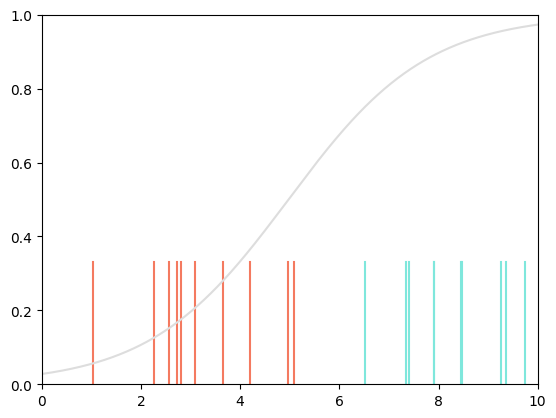

In [20]:
n_iter = 10
theta = 3.0
print("Theta before", theta)
theta = update_generator(z, theta, n_iter, phi0, phi1)
print("Theta after", theta)

x_syn = generator(z,theta)
draw_data_model(x_real, x_syn, phi0, phi1)

Final parameters (phi0,phi1) -2 1


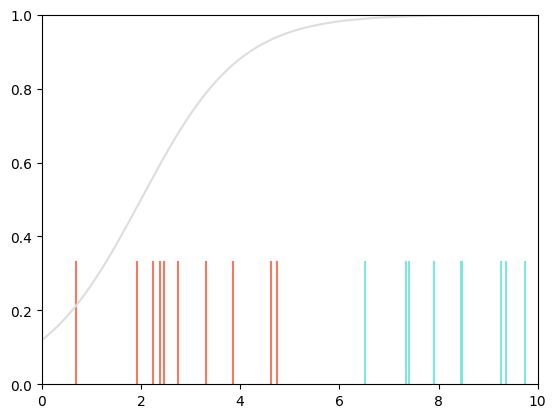

Updating discriminator
Initial discriminator loss =  13.814757170851447
Final Discriminator Loss=  2.31884746352303


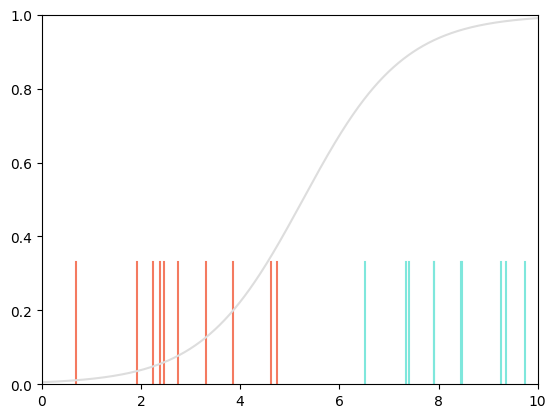

Updating generator
Initial generator loss =  1.5508571592286458
Final generator loss =  1.8282019408737256


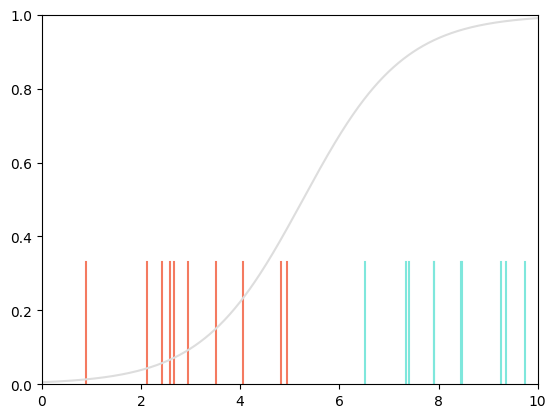

Updating discriminator
Initial discriminator loss =  2.59619224516811
Final Discriminator Loss=  1.7927515593459433


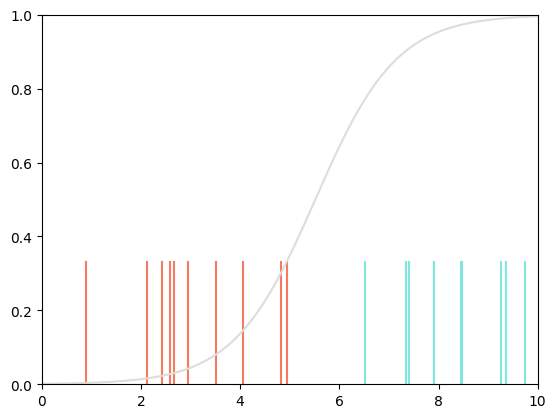

Updating generator
Initial generator loss =  1.1478917250240908
Final generator loss =  1.3904932768749843


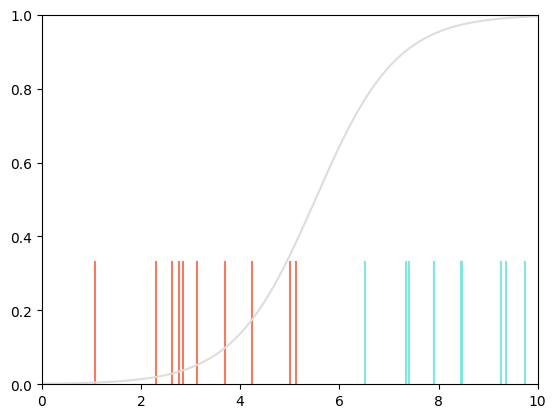

Updating discriminator
Initial discriminator loss =  2.035353111196837
Final Discriminator Loss=  1.62008013107962


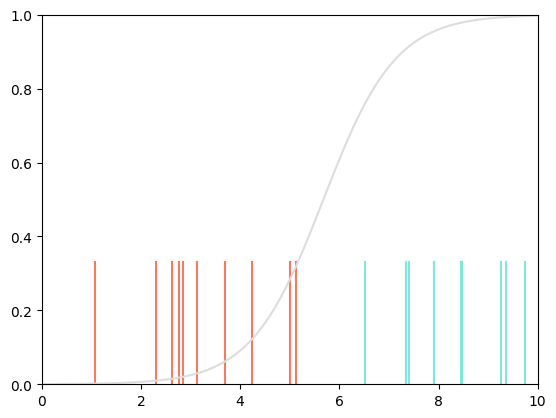

Updating generator
Initial generator loss =  1.0066227772629954
Final generator loss =  1.2503263489444798


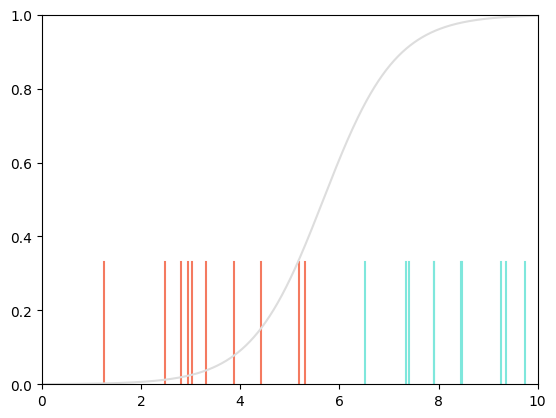

Updating discriminator
Initial discriminator loss =  1.8637837027611042
Final Discriminator Loss=  1.583616047958917


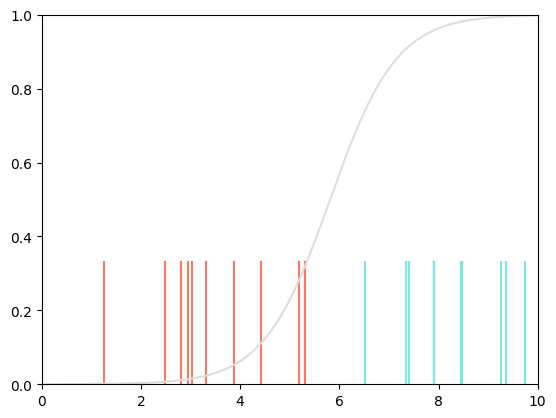

Updating generator
Initial generator loss =  0.9602203787517319
Final generator loss =  1.226651346240538


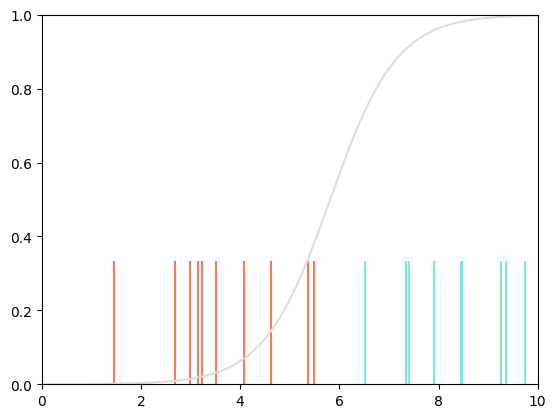

Updating discriminator
Initial discriminator loss =  1.8500470154477229
Final Discriminator Loss=  1.6331587085476436


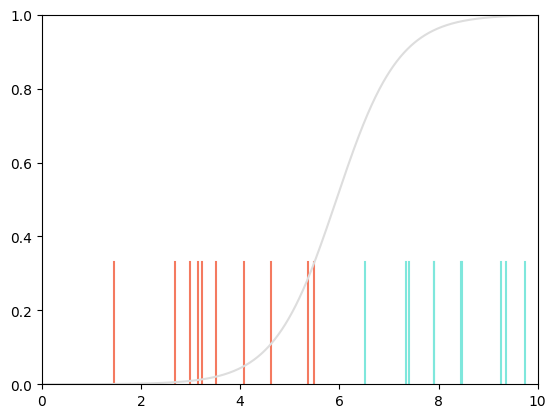

Updating generator
Initial generator loss =  0.9690221972131672
Final generator loss =  1.27991741096209


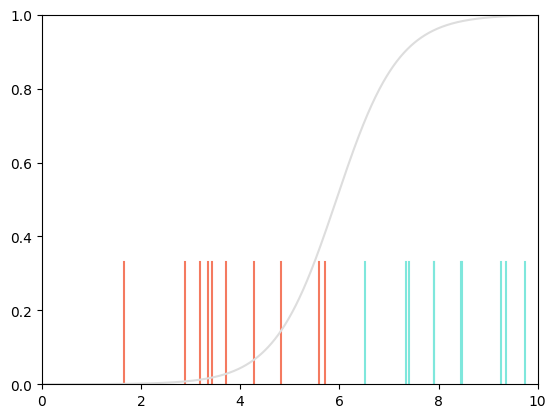

Updating discriminator
Initial discriminator loss =  1.9440539222965667
Final Discriminator Loss=  1.7607466199283748


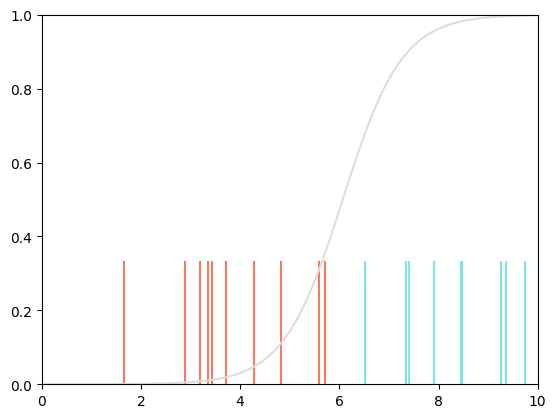

Updating generator
Initial generator loss =  1.0237032568055455
Final generator loss =  1.4082352965676266


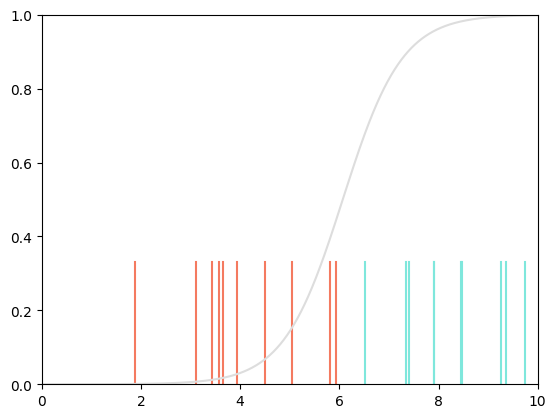

Updating discriminator
Initial discriminator loss =  2.1452786596904563
Final Discriminator Loss=  1.980051607569597


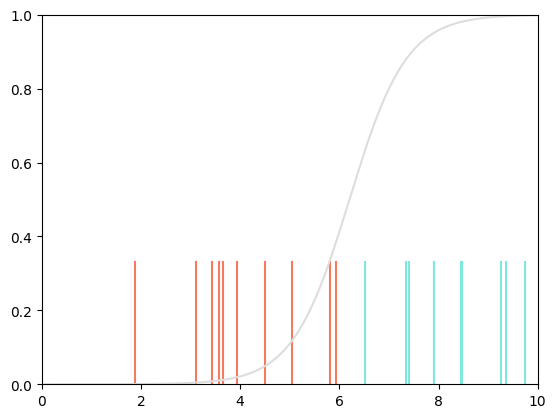

Updating generator
Initial generator loss =  1.1287086754173907
Final generator loss =  1.6319958677194992


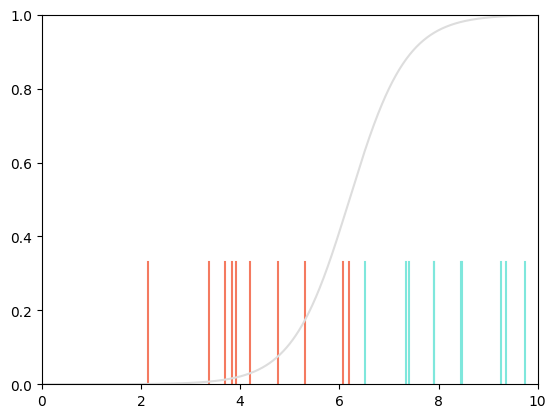

Updating discriminator
Initial discriminator loss =  2.483338799871705
Final Discriminator Loss=  2.3262086330334446


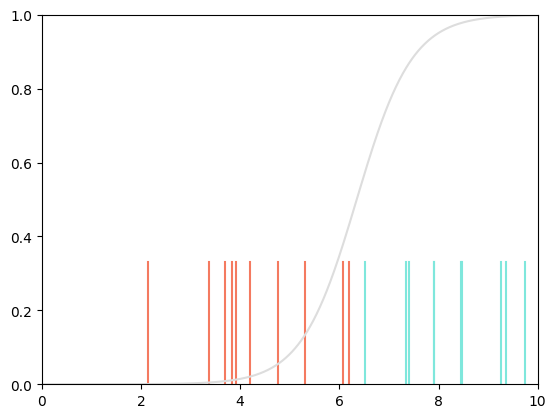

Updating generator
Initial generator loss =  1.3004518425323044
Final generator loss =  1.9973707038629411


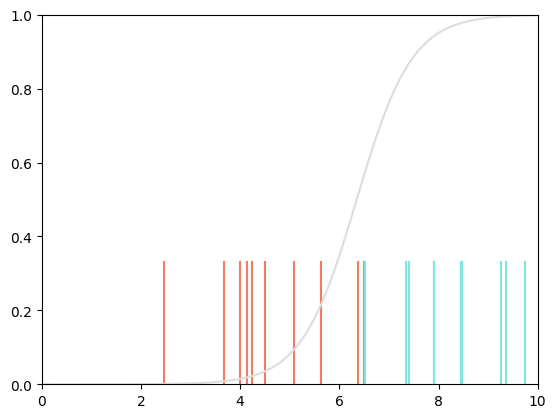

Updating discriminator
Initial discriminator loss =  3.0231274943640813
Final Discriminator Loss=  2.8656127016630197


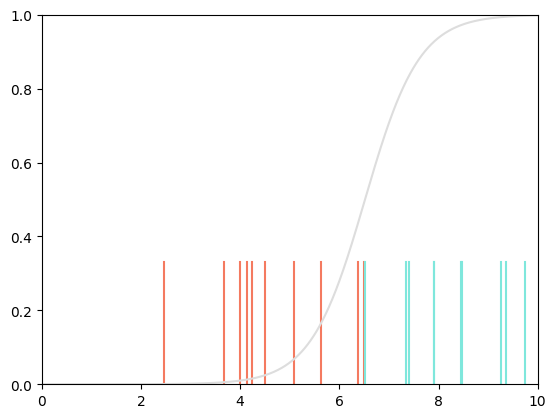

Updating generator
Initial generator loss =  1.5718168582399399
Final generator loss =  2.5904805451620927


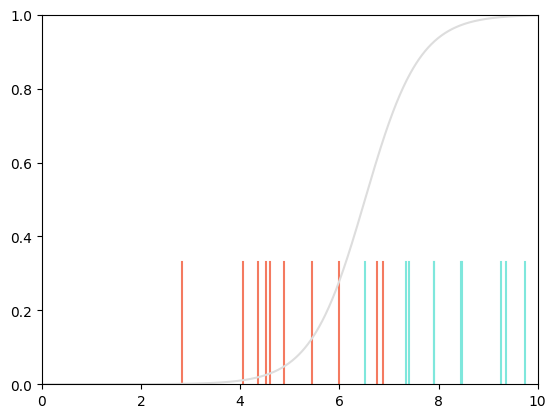

Updating discriminator
Initial discriminator loss =  3.884276388585172
Final Discriminator Loss=  3.7155512933895825


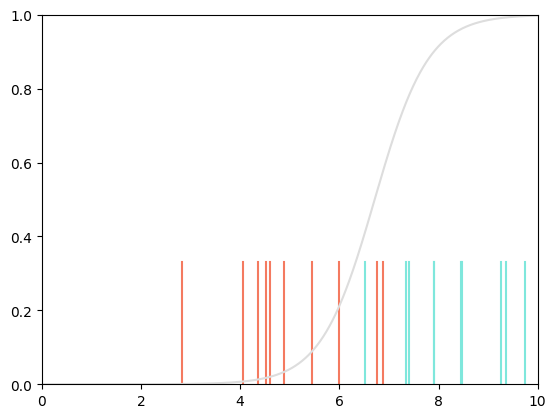

Updating generator
Initial generator loss =  2.002513488559414
Final generator loss =  3.5610916100924177


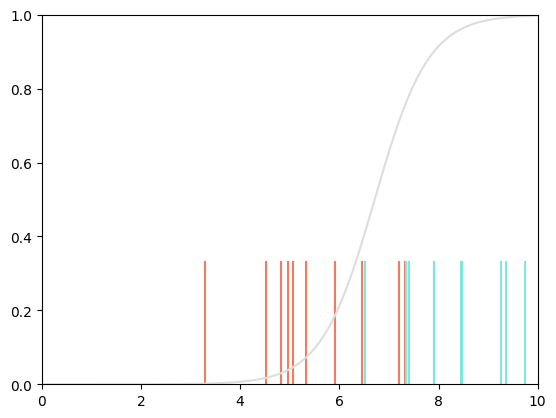

Updating discriminator
Initial discriminator loss =  5.274129414922586
Final Discriminator Loss=  5.072310876229449


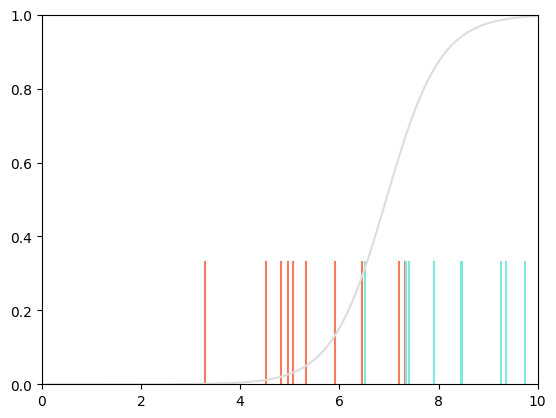

Updating generator
Initial generator loss =  2.694025985930388
Final generator loss =  5.148316926491775


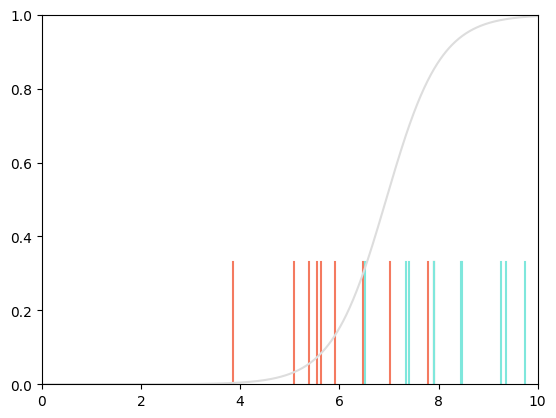

Updating discriminator
Initial discriminator loss =  7.526601816790838
Final Discriminator Loss=  7.229479411242347


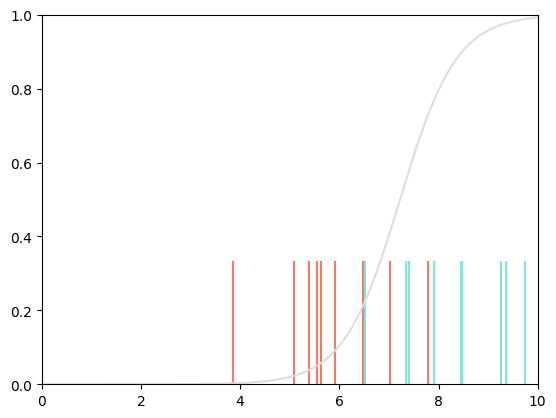

Updating generator
Initial generator loss =  3.7910273542133557
Final generator loss =  7.658771574103271


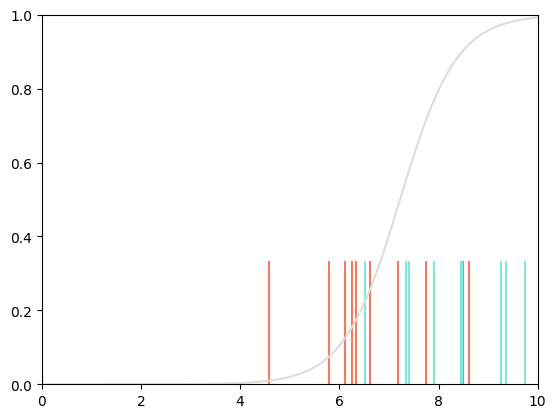

Updating discriminator
Initial discriminator loss =  11.097223631132264
Final Discriminator Loss=  10.506607133077972


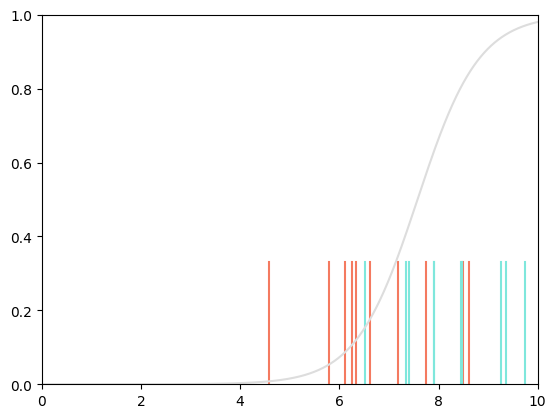

Updating generator
Initial generator loss =  5.395507430644836
Final generator loss =  11.098501961722564


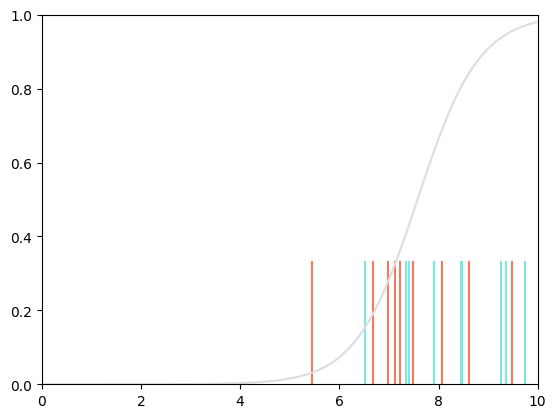

Updating discriminator
Initial discriminator loss =  16.2096016641557
Final Discriminator Loss=  20.039021911124788


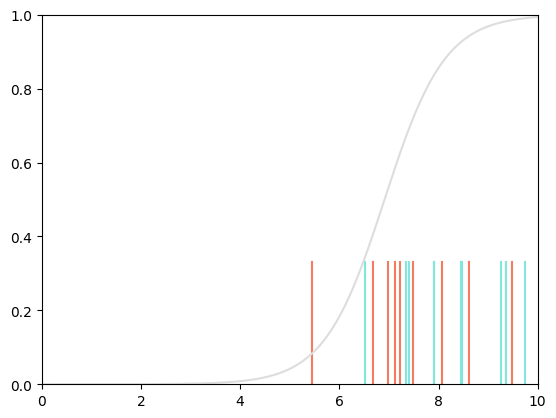

Updating generator
Initial generator loss =  17.64807182823898
Final generator loss =  43.07455714480418


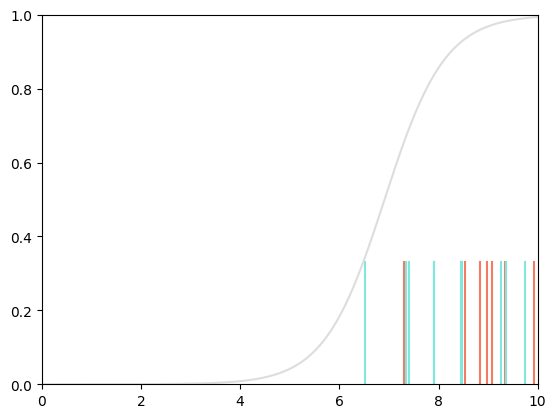

Updating discriminator
Initial discriminator loss =  45.46550722768999
Final Discriminator Loss=  40.345152567689304


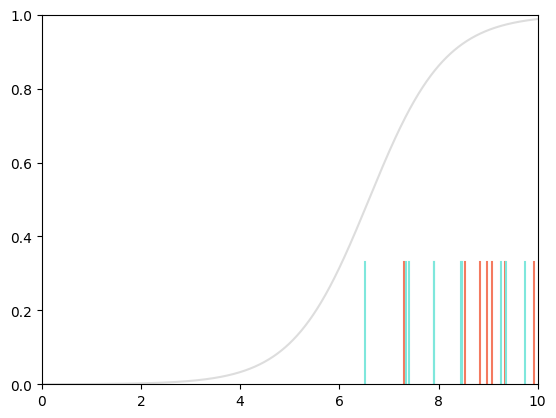

Updating generator
Initial generator loss =  38.40395250354973
Final generator loss =  60.94312812333013


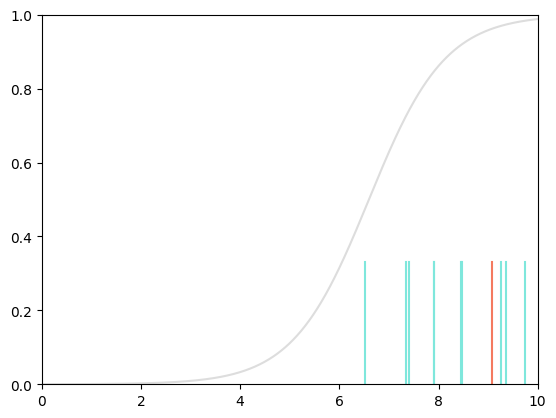

Updating discriminator
Initial discriminator loss =  62.884328187469706
Final Discriminator Loss=  29.626227876354996


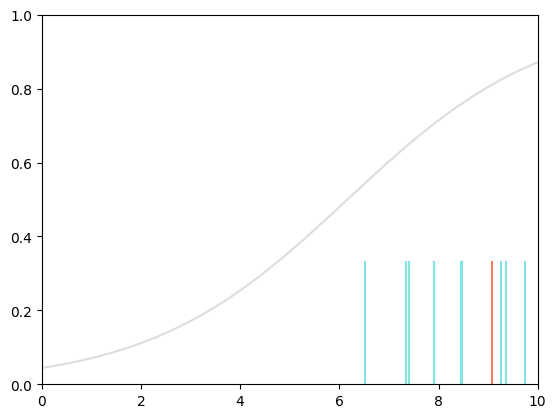

Updating generator
Initial generator loss =  26.360855405322408
Final generator loss =  29.35572233019991


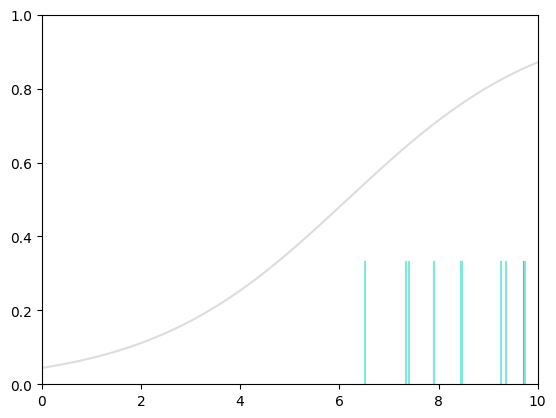

Updating discriminator
Initial discriminator loss =  32.62109480123249
Final Discriminator Loss=  44.47736783300294


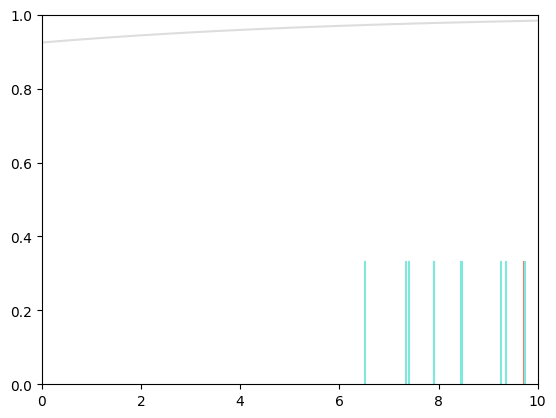

Updating generator
Initial generator loss =  44.25898044246601
Final generator loss =  44.60830725946279


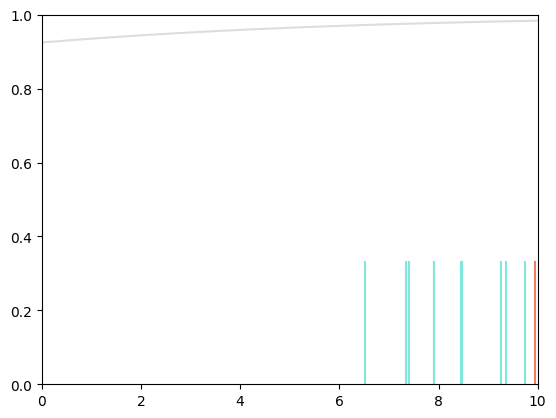

Updating discriminator
Initial discriminator loss =  44.826694649999716
Final Discriminator Loss=  25.08953614286935


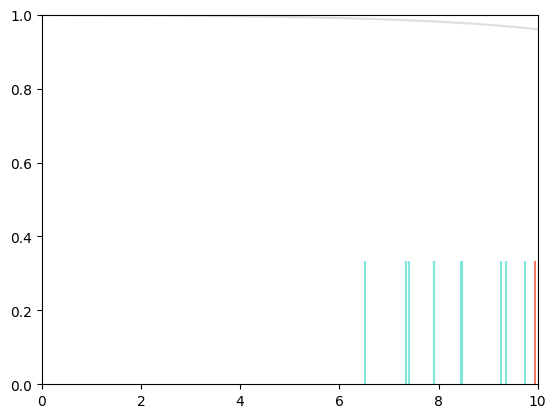

Updating generator
Initial generator loss =  24.867097208245386
Final generator loss =  26.52586429837624


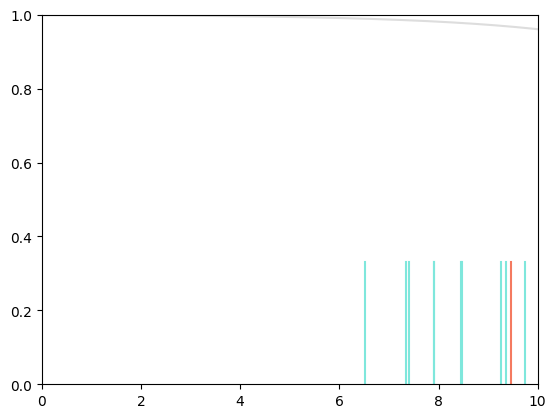

Updating discriminator
Initial discriminator loss =  26.748303233000208
Final Discriminator Loss=  12.651775515807884


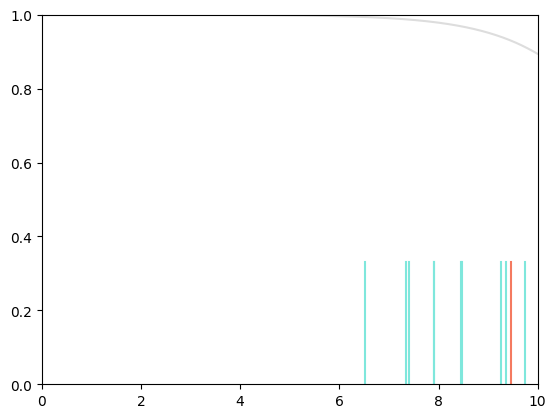

Updating generator
Initial generator loss =  12.293798374364181
Final generator loss =  17.184396740785928


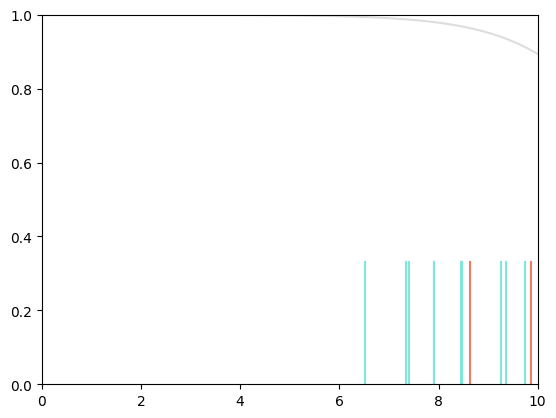

Updating discriminator
Initial discriminator loss =  17.54237388222963
Final Discriminator Loss=  13.085147081184019


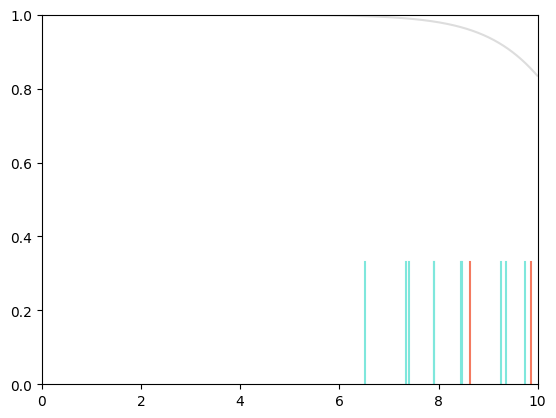

Updating generator
Initial generator loss =  12.637207388106297
Final generator loss =  21.579307495426903


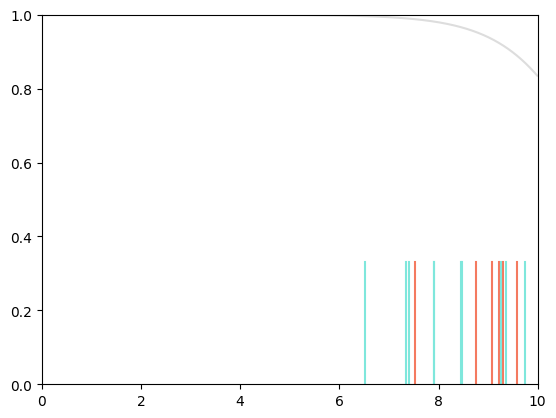

Updating discriminator
Initial discriminator loss =  22.02724718850462
Final Discriminator Loss=  18.023023065035243


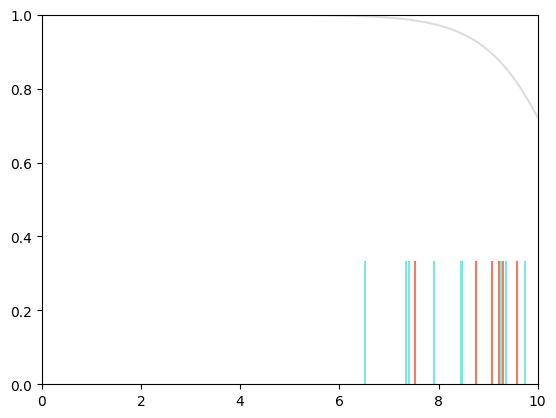

Updating generator
Initial generator loss =  17.294733062470822
Final generator loss =  32.619914613025394


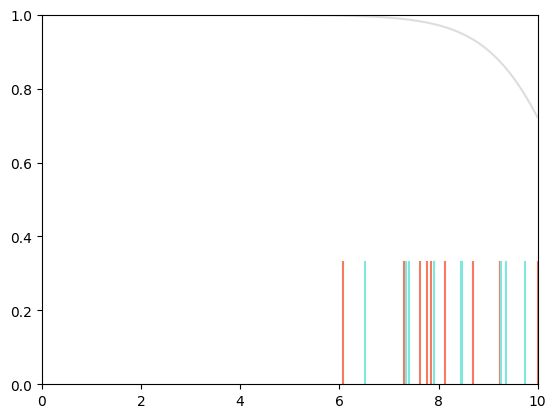

Updating discriminator
Initial discriminator loss =  33.348204615589815
Final Discriminator Loss=  26.549134016654843


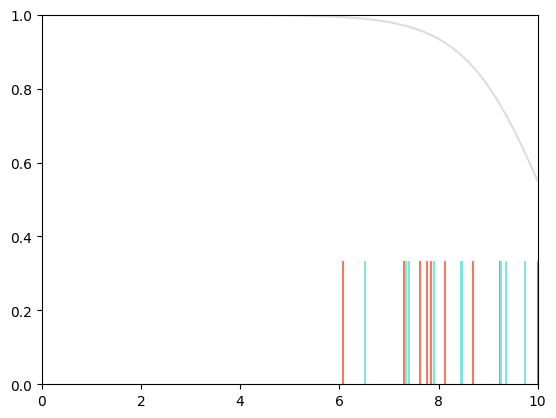

Updating generator
Initial generator loss =  25.047006435950436
Final generator loss =  42.55858649170719


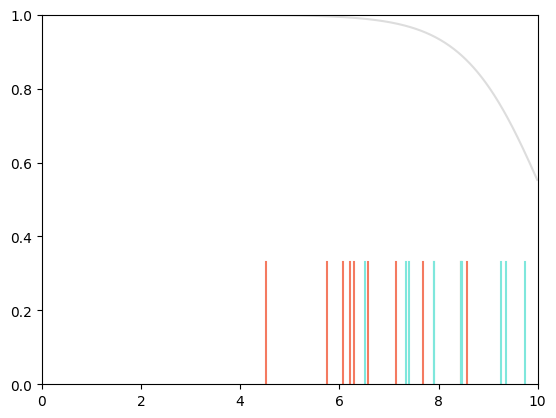

Updating discriminator
Initial discriminator loss =  44.060714072411585
Final Discriminator Loss=  29.83248174471346


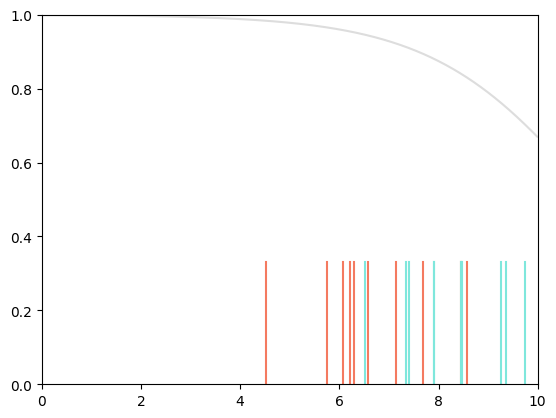

Updating generator
Initial generator loss =  28.071428430919887
Final generator loss =  32.79691272237653


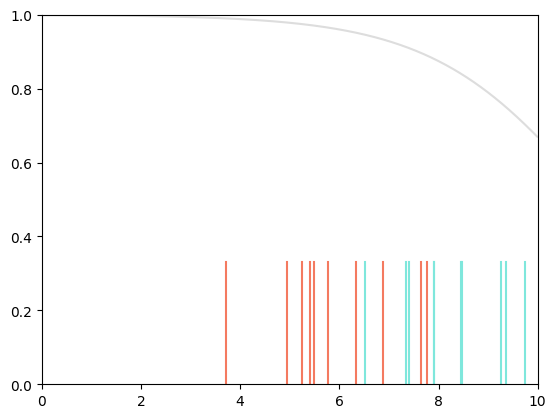

Updating discriminator
Initial discriminator loss =  34.5579660361701
Final Discriminator Loss=  22.596349270416656


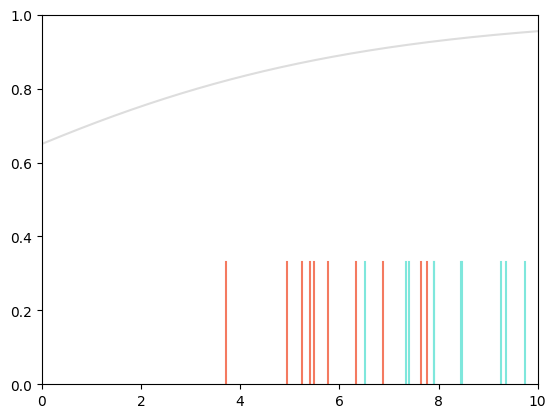

Updating generator
Initial generator loss =  21.883905574934865
Final generator loss =  22.542124060818733


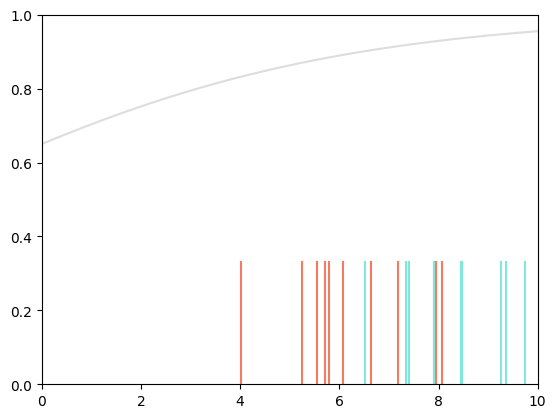

Updating discriminator
Initial discriminator loss =  23.254567756300524
Final Discriminator Loss=  17.58204887661867


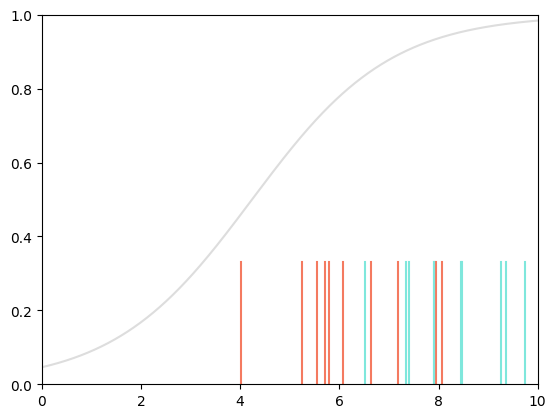

Updating generator
Initial generator loss =  16.892896060153696
Final generator loss =  21.61250997130639


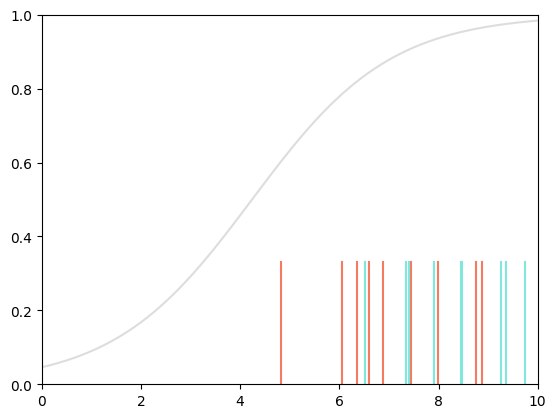

Updating discriminator
Initial discriminator loss =  22.301662787771367
Final Discriminator Loss=  23.069659254954068


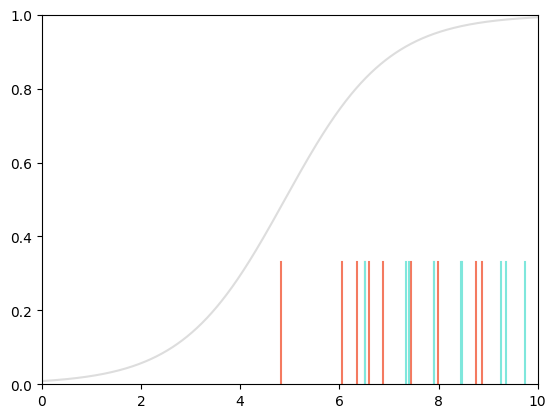

Updating generator
Initial generator loss =  22.4985956118033
Final generator loss =  32.889625150501004


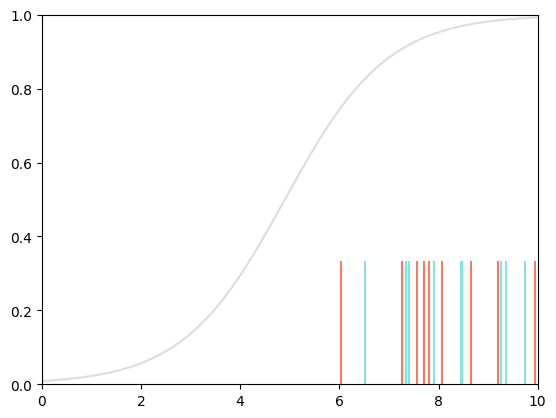

Updating discriminator
Initial discriminator loss =  33.46068879365177
Final Discriminator Loss=  33.353475025998875


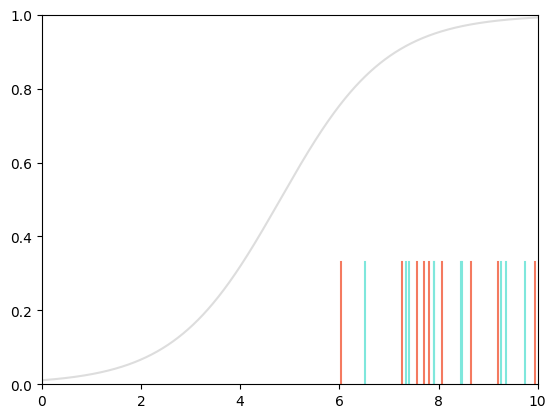

Updating generator
Initial generator loss =  32.78962525460812
Final generator loss =  44.15798156412967


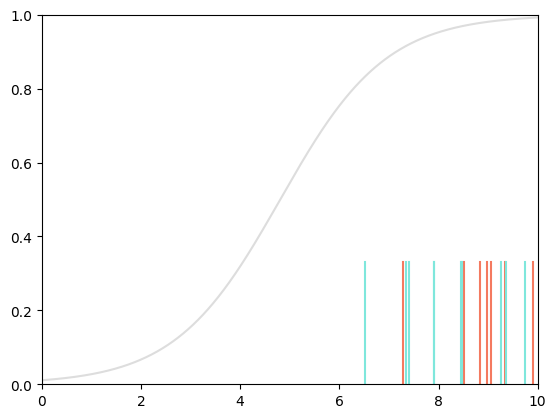

Updating discriminator
Initial discriminator loss =  44.72183133552043
Final Discriminator Loss=  30.646832457150524


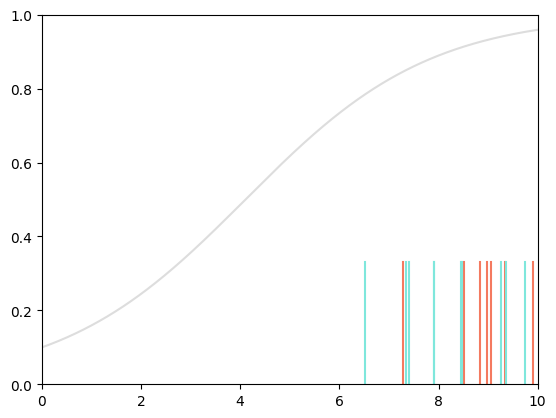

Updating generator
Initial generator loss =  29.485800801531816
Final generator loss =  33.087549145188945


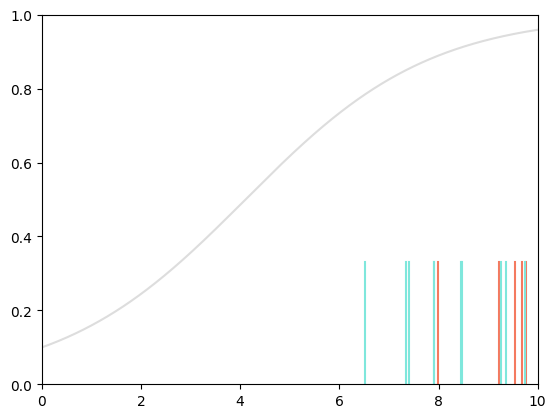

Updating discriminator
Initial discriminator loss =  34.24858080080766
Final Discriminator Loss=  24.10088090467877


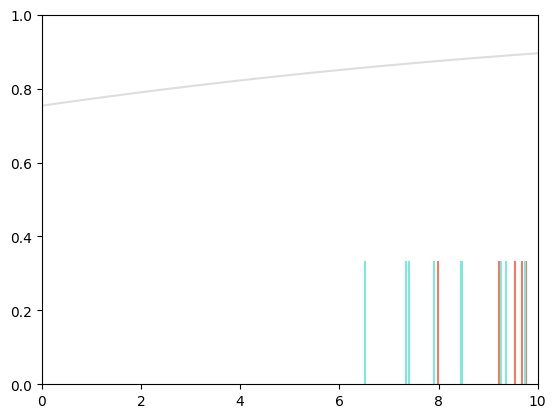

Updating generator
Initial generator loss =  22.787281571080293
Final generator loss =  22.9070120599456


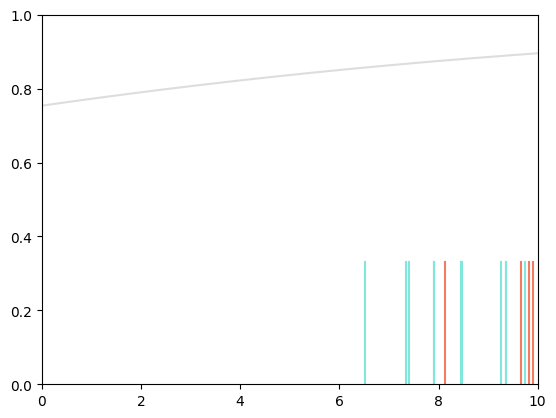

Updating discriminator
Initial discriminator loss =  24.220611393544083
Final Discriminator Loss=  20.87294751312532


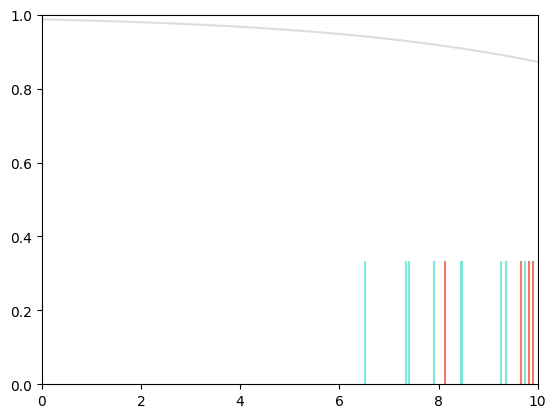

Updating generator
Initial generator loss =  19.942215024634717
Final generator loss =  20.564469084161356


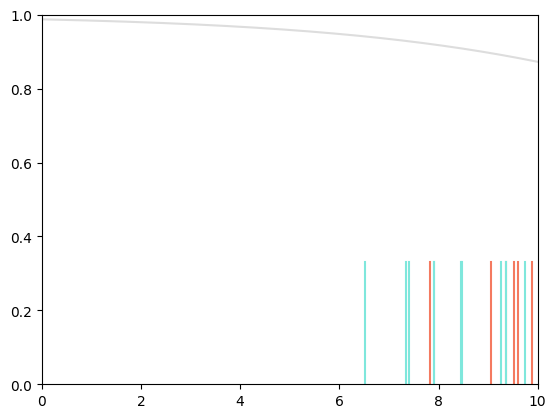

Updating discriminator
Initial discriminator loss =  21.495201572651965
Final Discriminator Loss=  21.02833339084238


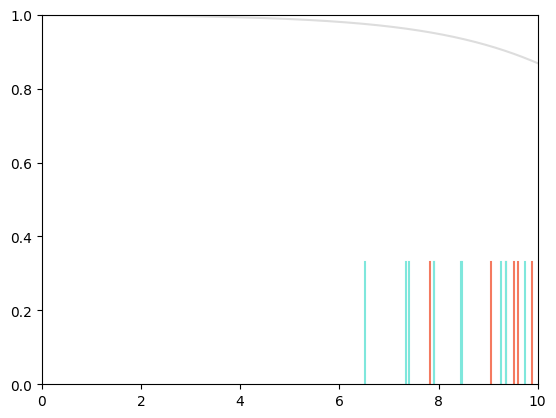

Updating generator
Initial generator loss =  20.360865818282058
Final generator loss =  23.077371656123248


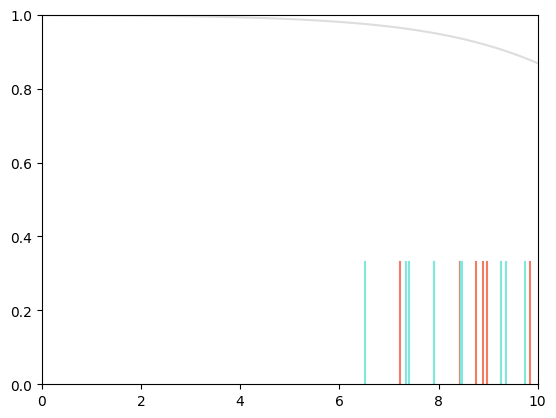

Updating discriminator
Initial discriminator loss =  23.744839228683578
Final Discriminator Loss=  23.61181878553669


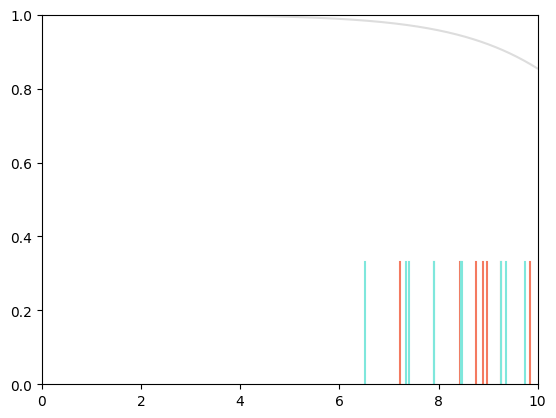

Updating generator
Initial generator loss =  23.001034078505054
Final generator loss =  28.158314907304753


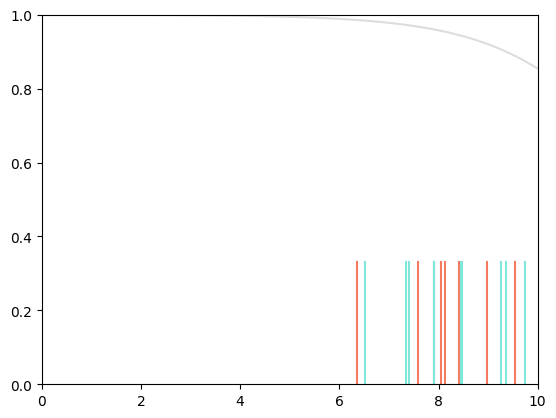

Updating discriminator
Initial discriminator loss =  28.769099614336383
Final Discriminator Loss=  27.720726656701977


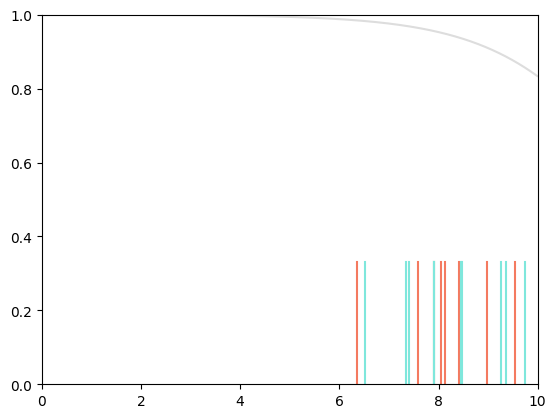

Updating generator
Initial generator loss =  27.029099662632277
Final generator loss =  32.96253142518112


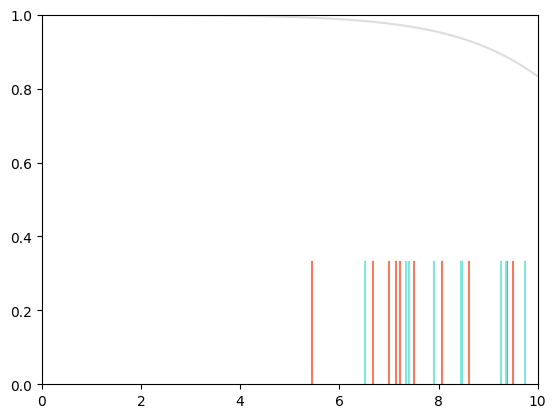

Updating discriminator
Initial discriminator loss =  33.65415841925082
Final Discriminator Loss=  30.456097526691273


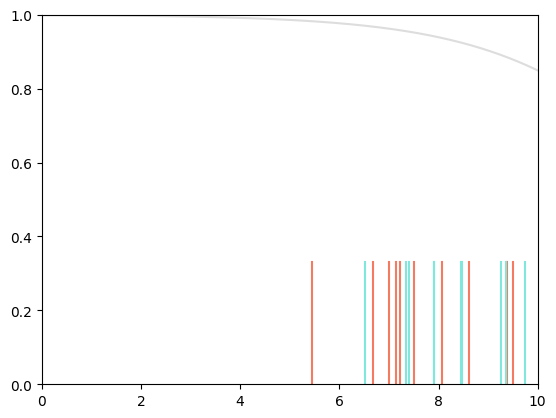

Updating generator
Initial generator loss =  29.6730104789504
Final generator loss =  32.85444460461432


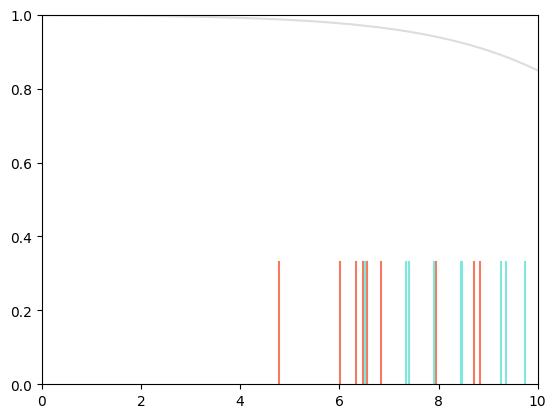

Updating discriminator
Initial discriminator loss =  33.63753165235519
Final Discriminator Loss=  29.77298583959565


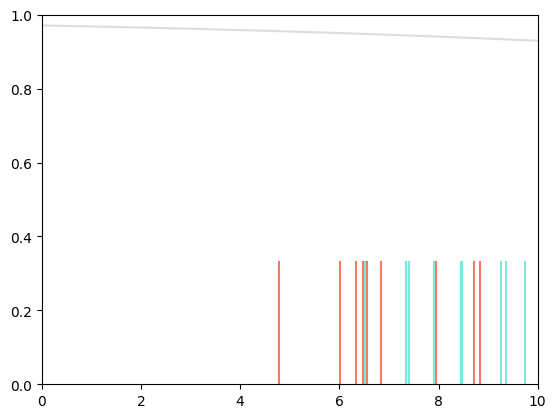

Updating generator
Initial generator loss =  29.146591804579504
Final generator loss =  29.255204390393526


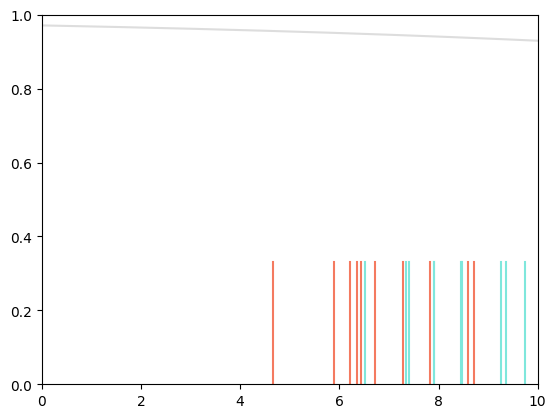

Updating discriminator
Initial discriminator loss =  29.881598425409678
Final Discriminator Loss=  27.89918414396124


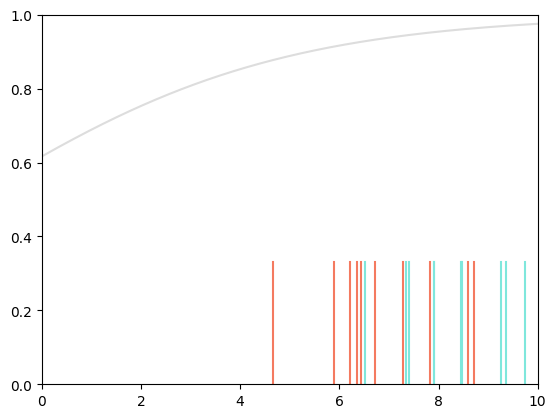

Updating generator
Initial generator loss =  27.443301400770572
Final generator loss =  28.69797595600911


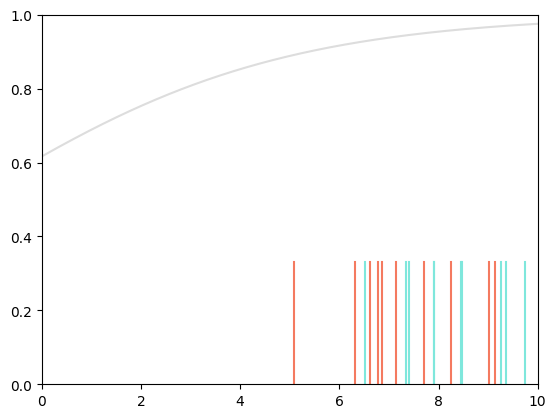

Updating discriminator
Initial discriminator loss =  29.153858699199773
Final Discriminator Loss=  29.148197055568374


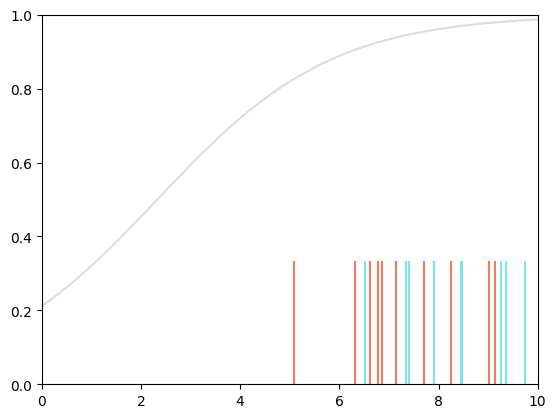

Updating generator
Initial generator loss =  28.747828241404875
Final generator loss =  32.72216227642447


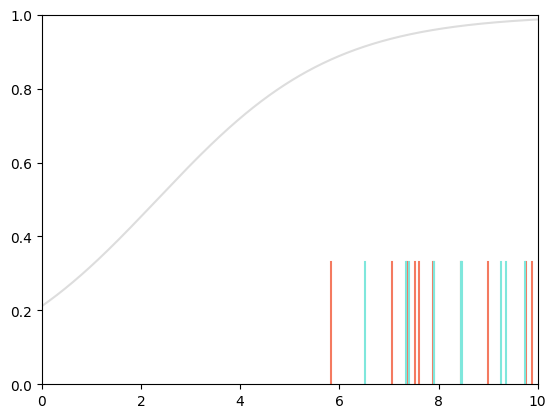

Updating discriminator
Initial discriminator loss =  33.12253109058797
Final Discriminator Loss=  32.59794160181583


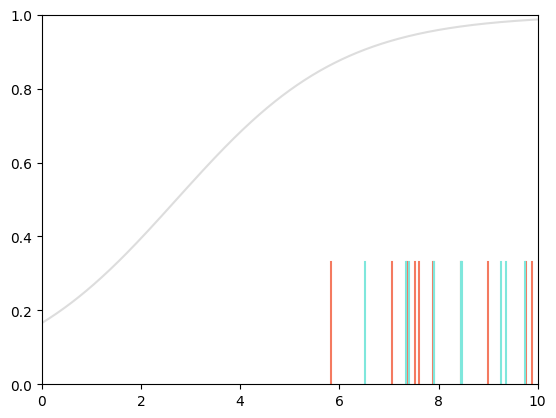

Updating generator
Initial generator loss =  32.17012544367533
Final generator loss =  36.73415327223443


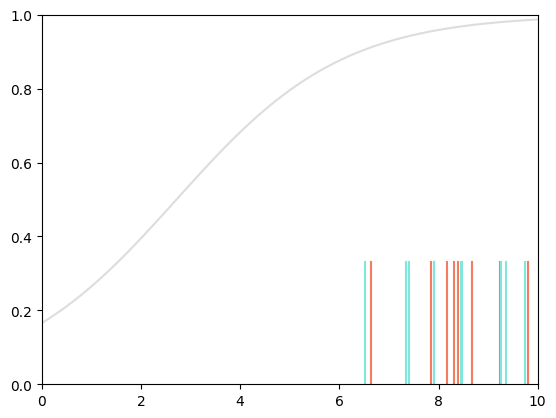

Updating discriminator
Initial discriminator loss =  37.16196943037492
Final Discriminator Loss=  31.30679244966867


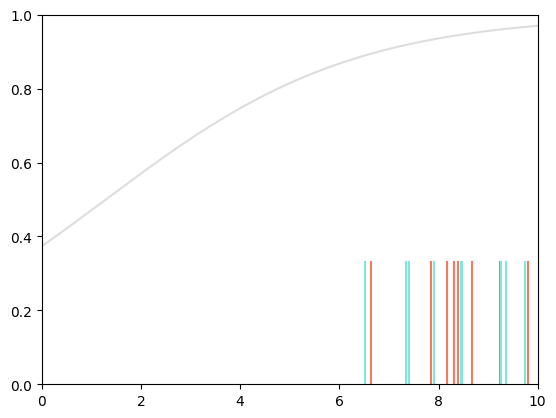

Updating generator
Initial generator loss =  30.659729817825273
Final generator loss =  32.68943128546175


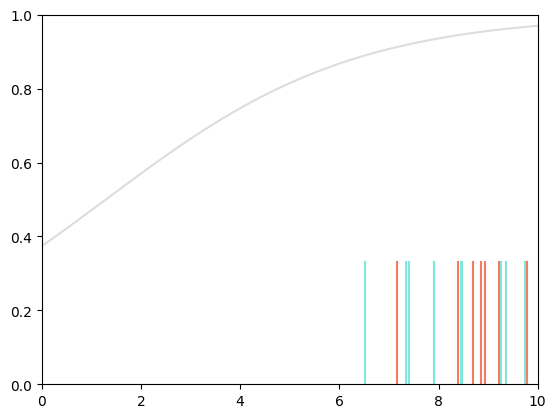

Updating discriminator
Initial discriminator loss =  33.33649391730515
Final Discriminator Loss=  27.32911514680067


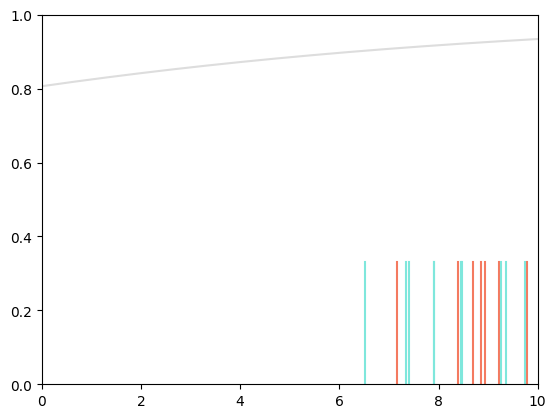

Updating generator
Initial generator loss =  26.485097444197578
Final generator loss =  26.66659151679464


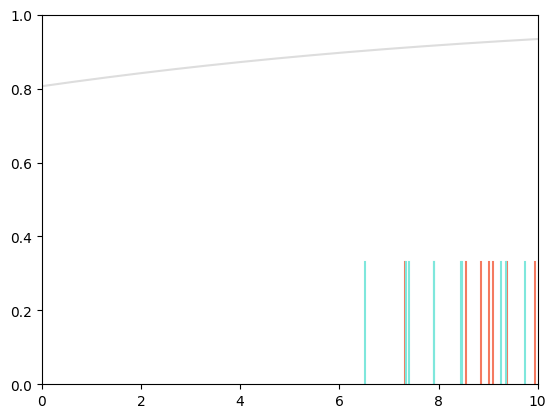

Updating discriminator
Initial discriminator loss =  27.51060921939773
Final Discriminator Loss=  25.10107121375196


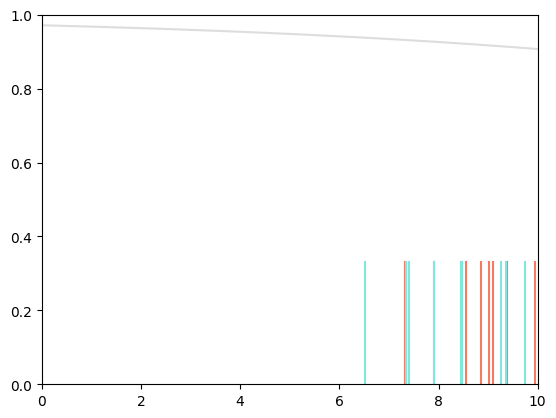

Updating generator
Initial generator loss =  24.305625925632274
Final generator loss =  24.486796924505757


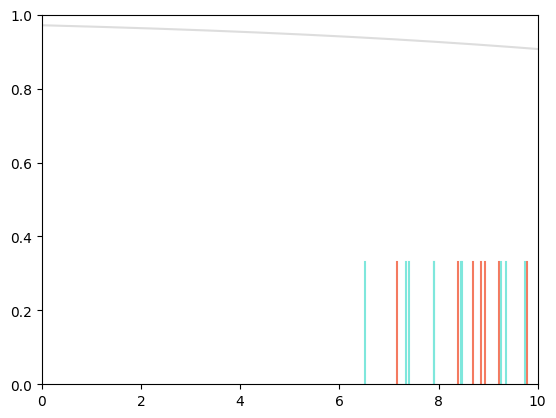

Updating discriminator
Initial discriminator loss =  25.282242212625444
Final Discriminator Loss=  25.118364704846563


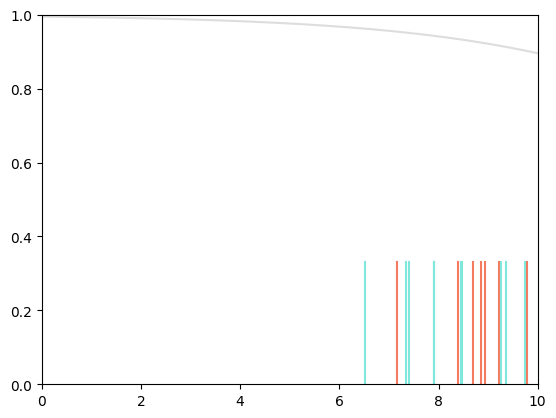

Updating generator
Initial generator loss =  24.44050618464032
Final generator loss =  25.57751215294141


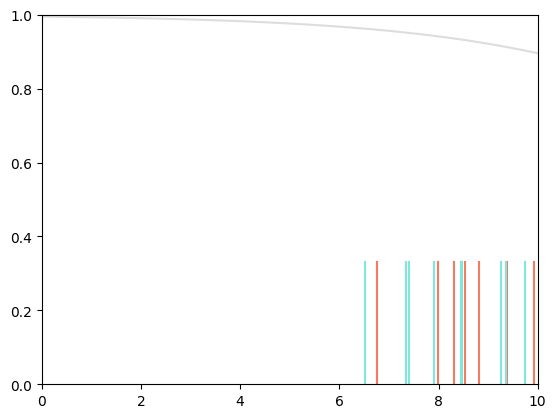

Updating discriminator
Initial discriminator loss =  26.255370673147645
Final Discriminator Loss=  26.893209658411863


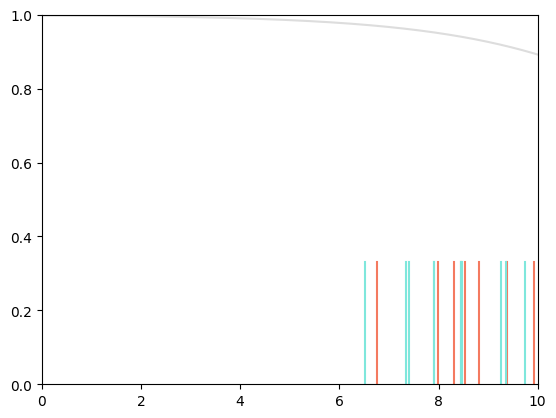

Updating generator
Initial generator loss =  26.287902461929534
Final generator loss =  28.392782698624025


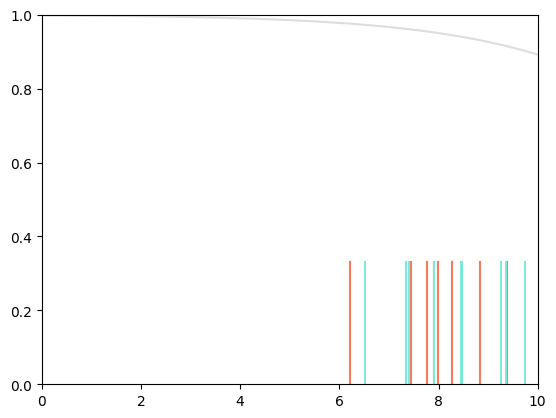

Updating discriminator
Initial discriminator loss =  28.998089895106357
Final Discriminator Loss=  29.332172023096895


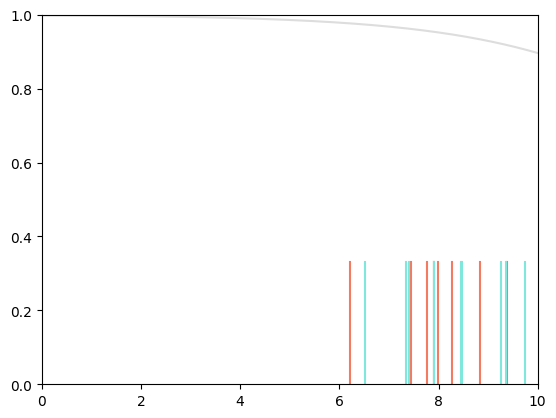

Updating generator
Initial generator loss =  28.74909448153063
Final generator loss =  30.894166695487957


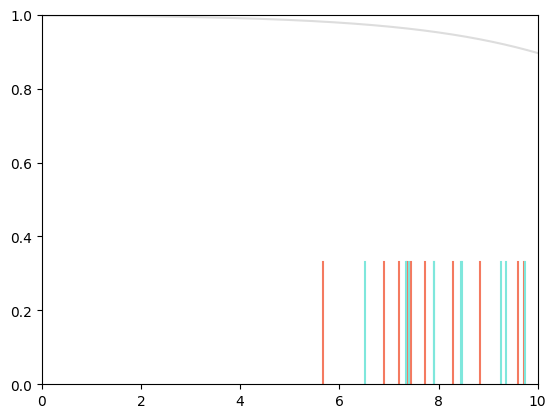

Updating discriminator
Initial discriminator loss =  31.47724423705422
Final Discriminator Loss=  30.890370594079496


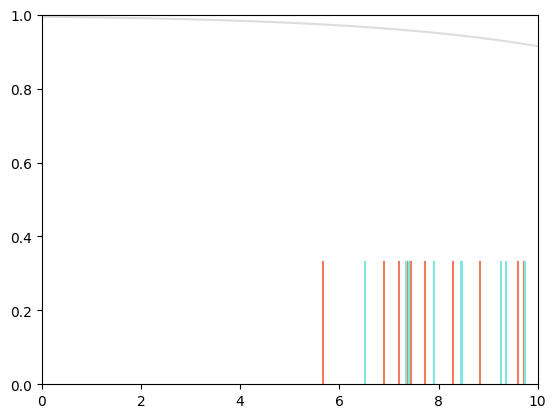

Updating generator
Initial generator loss =  30.323792495923634
Final generator loss =  31.348329641132334


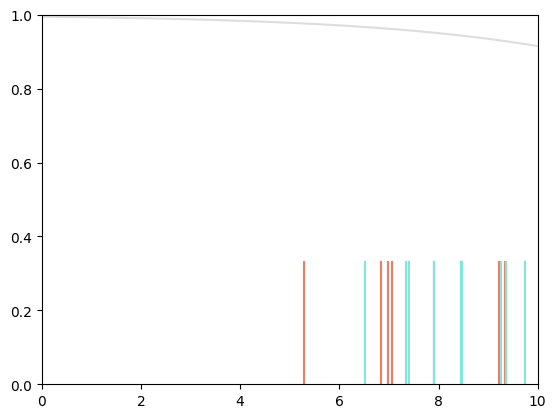

Updating discriminator
Initial discriminator loss =  31.9149077392882
Final Discriminator Loss=  31.067211249923737


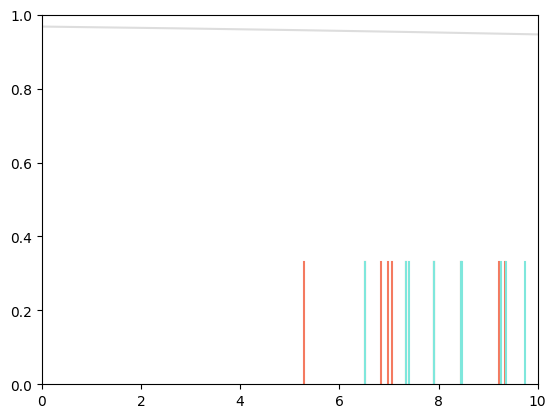

Updating generator
Initial generator loss =  30.565951915950592
Final generator loss =  30.6013651819831


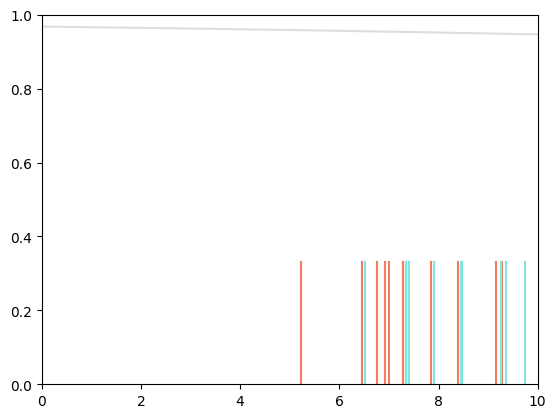

Updating discriminator
Initial discriminator loss =  31.102624515956244
Final Discriminator Loss=  30.895707025713136


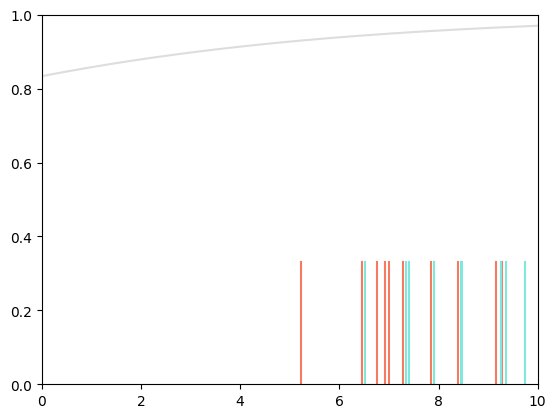

Updating generator
Initial generator loss =  30.46887551770356
Final generator loss =  30.91098042033618


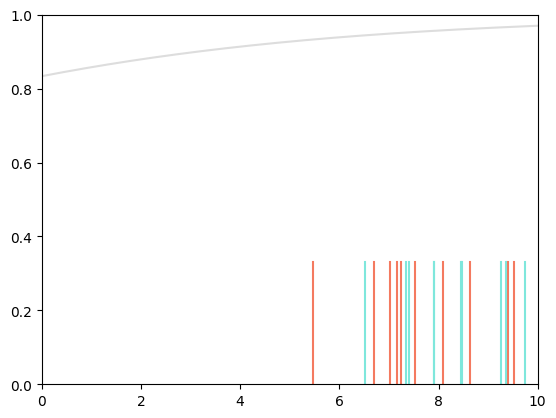

Updating discriminator
Initial discriminator loss =  31.337811928345758
Final Discriminator Loss=  31.60129633353114


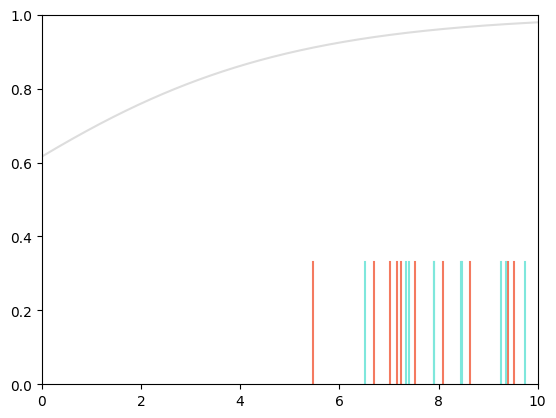

Updating generator
Initial generator loss =  31.205812348615574
Final generator loss =  32.671886156155786


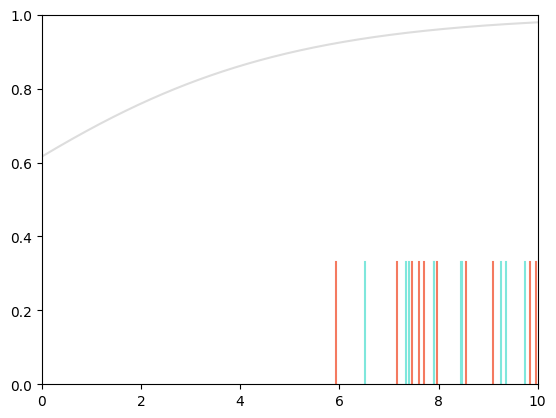

Updating discriminator
Initial discriminator loss =  33.06737014107136
Final Discriminator Loss=  32.41023162855724


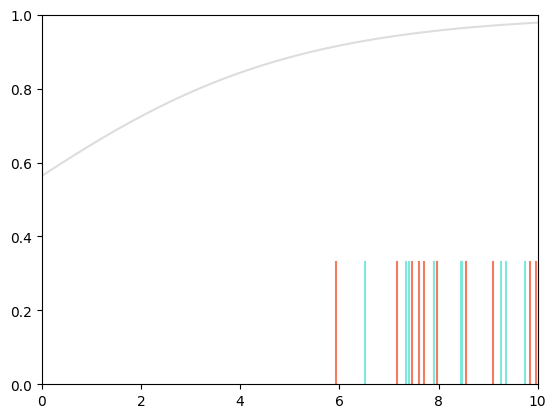

Updating generator
Initial generator loss =  31.984350738707505
Final generator loss =  33.61947426870217


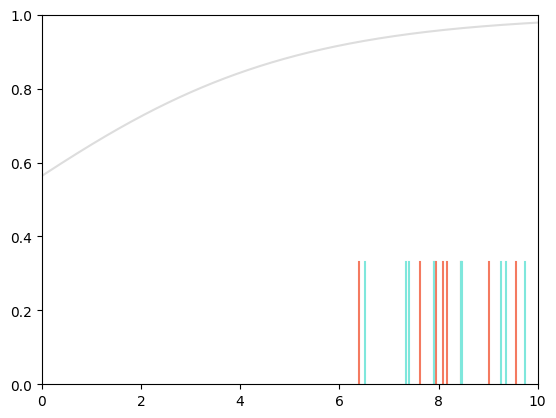

Updating discriminator
Initial discriminator loss =  34.0453551585519
Final Discriminator Loss=  31.246699038214683


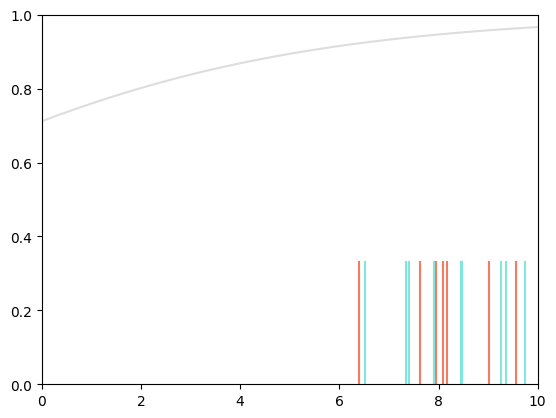

Updating generator
Initial generator loss =  30.713118992425823
Final generator loss =  31.483548882782284


In [23]:
# Now let's define a full GAN loop

# Initialize the parameters
theta = 3
phi0 = -2
phi1 = 1

# Number of iterations for updating generator and discriminator
n_iter_discrim = 300
n_iter_gen = 7

print("Final parameters (phi0,phi1)", phi0, phi1)
for c_gan_iter in range(50):

  # Run generator to product synthesized data
  x_syn = generator(z, theta)
  draw_data_model(x_real, x_syn, phi0, phi1)

  # Update the discriminator
  print("Updating discriminator")
  phi0, phi1 = update_discriminator(x_real, x_syn, n_iter_discrim, phi0, phi1)
  draw_data_model(x_real, x_syn, phi0, phi1)

  # Update the generator
  print("Updating generator")
  theta = update_generator(z, theta, n_iter_gen, phi0, phi1)


You can see that the synthesized data (orange) is becoming closer to the true data (cyan).  However, this is extremely unstable -- as you will find if you mess around with the number of iterations of each optimization and the total iterations overall.